In [1]:
# librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install missingno
import missingno as msno 


In [2]:
# leer los datos de Licencias_Locales_202104.csv
licencias_pd = pd.read_csv('Licencias_Locales_202104.csv', delimiter=';')
licencias_pd.sample(10)

id_local  id_distrito_local   desc_distrito_local  id_barrio_local  \
28545   270173955                 15  CIUDAD LINEAL                    1505   
131113  285045727                 15  CIUDAD LINEAL                    1503   
84143   280022474                  5  CHAMARTIN                         504   
95736   280046510                  8  FUENCARRAL-EL PARDO               806   
109712  280066115                 20  SAN BLAS-CANILLEJAS              2004   
37684   270344955                 14  MORATALAZ                        1403   
115782  285001856                  1  CENTRO                            102   
33959   270269772                  1  CENTRO                            101   
23305   270109464                  6  TETUAN                            605   
40089   270377667                  6  TETUAN                            605   

           desc_barrio_local  cod_barrio_local  id_seccion_censal_local  \
28545   SAN PASCUAL                          5                    15132   
131113  QUINTANA                             3                    15100   
84143   HISPANOAMERICA                       4                     5060   
95736   VALVERDE                             6                     8174   
109712  ARCOS                                4                    20053   
37684   MARROQUINA                           3                    14021   
115782  EMBAJADORES                          2                     1030   
33959   PALACIO                              1                     1018   
23305   VALDEACEDERAS                        5                     6105   
40089   VALDEACEDERAS                        5                     6092   

        desc_seccion_censal_local coordenada_x_local coordenada_y_local  ...  \
28545                         132          444514,58         4476578,48  ...   
131113                        100          445452,57         4476311,47  ...   
84143                          60           442588,6         4478818,51  ...   
95736                         174          442988,63         4484875,53  ...   
109712                         53          447765,56         4475380,43  ...   
37684                          21          444893,56         4473436,47  ...   
115782                         30          440062,59         4473433,53  ...   
33959                          18           439415,6         4473669,54  ...   
23305                         105          440649,61         4479567,54  ...   
40089                          92          440953,61         4479526,54  ...   

                desc_tipo_agrup id_planta_agrupado  id_local_agrupado  \
28545            SIN AGRUPACION                 PB                NaN   
131113           SIN AGRUPACION                 PB                NaN   
84143            SIN AGRUPACION                 PB                NaN   
95736   Agrupación no comercial                  5                145   
109712           SIN AGRUPACION                 PB                NaN   
37684            SIN AGRUPACION                 PB                NaN   
115782           SIN AGRUPACION                 PB                NaN   
33959            SIN AGRUPACION                 PB                NaN   
23305            SIN AGRUPACION                 PB                NaN   
40089            SIN AGRUPACION                 PB                NaN   

                                      rotulo    ref_licencia  \
28545                            MONTPELLIER  116/2005/04779   
131113                                O & RA  500/2014/04149   
84143                              SANTANDER  105/1999/00656   
95736                                PYCSECA  500/2012/00931   
109712  EL CISNE - FABRICA DE PATATAS FRITAS  117/2003/01937   
37684                           LAVO EXPRESS  500/2013/06578   
115782                        SALA DE ESCAPE  500/2017/10381   
33959                              HANGAR 48  500/2018/02296   
23305                        HERNANDEZ MOTOR  500/20

In [3]:
# Dimensiones y tipos de datos del dataset

licencias_pd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132171 entries, 0 to 132170
Data columns (total 46 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   id_local                      132171 non-null  int64 
 1   id_distrito_local             132171 non-null  int64 
 2   desc_distrito_local           132171 non-null  object
 3   id_barrio_local               132171 non-null  int64 
 4   desc_barrio_local             132171 non-null  object
 5   cod_barrio_local              132171 non-null  int64 
 6   id_seccion_censal_local       132171 non-null  int64 
 7   desc_seccion_censal_local     132171 non-null  int64 
 8   coordenada_x_local            132171 non-null  object
 9   coordenada_y_local            132171 non-null  object
 10  id_tipo_acceso_local          132171 non-null  int64 
 11  desc_tipo_acceso_local        132171 non-null  object
 12  id_situacion_local            132171 non-null  int64 
 13 

In [4]:
# valores nulos
licencias_pd.isnull().sum()[licencias_pd.isnull().sum() > 0]

coordenada_x_agrupacion    123997
coordenada_y_agrupacion    123997
id_planta_agrupado            312
id_local_agrupado          124005
dtype: int64

In [5]:
# Mostar todas las columnas del dataset
pd.set_option('display.max_columns', None)
licencias_pd.describe(include='all')


id_local  id_distrito_local   desc_distrito_local  \
count   1.321710e+05      132171.000000                132171   
unique           NaN                NaN                    21   
top              NaN                NaN  CENTRO                 
freq             NaN                NaN                 15810   
mean    2.504209e+08           8.853765                   NaN   
std     6.773607e+07           5.725470                   NaN   
min     1.000001e+07           1.000000                   NaN   
25%     2.702225e+08           4.000000                   NaN   
50%     2.705465e+08           8.000000                   NaN   
75%     2.800486e+08          13.000000                   NaN   
max     2.900016e+08          21.000000                   NaN   

        id_barrio_local     desc_barrio_local  cod_barrio_local  \
count     132171.000000                132171     132171.000000   
unique              NaN                   131               NaN   
top                 NaN  EMBAJADORES                        NaN   
freq                NaN                  3587               NaN   
mean         888.872763                   NaN          3.496244   
std          572.527589                   NaN          1.848652   
min          101.000000                   NaN          1.000000   
25%          404.000000                   NaN          2.000000   
50%          804.000000                   NaN          3.000000   
75%         1305.000000                   NaN          5.000000   
max         2105.000000                   NaN          9.000000   

        id_seccion_censal_local  desc_seccion_censal_local coordenada_x_local  \
count             132171.000000              132171.000000             132171   
unique                      NaN                        NaN              36370   
top                         NaN                        NaN                  0   
freq                        NaN                        NaN               4495   
mean                8924.097124                  70.331926                NaN   
std                 5729.397065                  47.777896                NaN   
min                 1001.000000                   1.000000                NaN   
25%                 4061.000000                  31.000000                NaN   
50%                 8086.000000                  65.000000                NaN   
75%                13157.000000                 103.000000                NaN   
max                21033.000000                 221.000000                NaN   

       coordenada_y_local  id_tipo_acceso_local desc_tipo_acceso_local  \
count              132171         132171.000000                 132171   
unique              46338                   NaN                      3   
top                     0                   NaN           Puerta Calle   
freq                 4495                   NaN                 123722   
mean                  NaN              0.961043                    NaN   
std                   NaN              0.558647                    NaN   
min                   NaN              0.000000                    NaN   
25%                   NaN              1.000000                    NaN   
50%                   NaN              1.000000                    NaN   
75%                   NaN              1.000000                    NaN   
max                   NaN             12.000000                    NaN   

        id_situacion_local desc_situacion_local  id_ndp_edificio  \
count        132171.000000               132171     1.321710e+05   
unique                 NaN                    7              NaN   
top                    NaN              Abierto              NaN   
freq                   NaN               127639              NaN   
mean              1.144222                  NaN     1.359786e+07   
std               0.856491                  NaN     5.697392e+06   
min               1.000000                  NaN     1.100000e+07   
25%               1.

<Axes: >

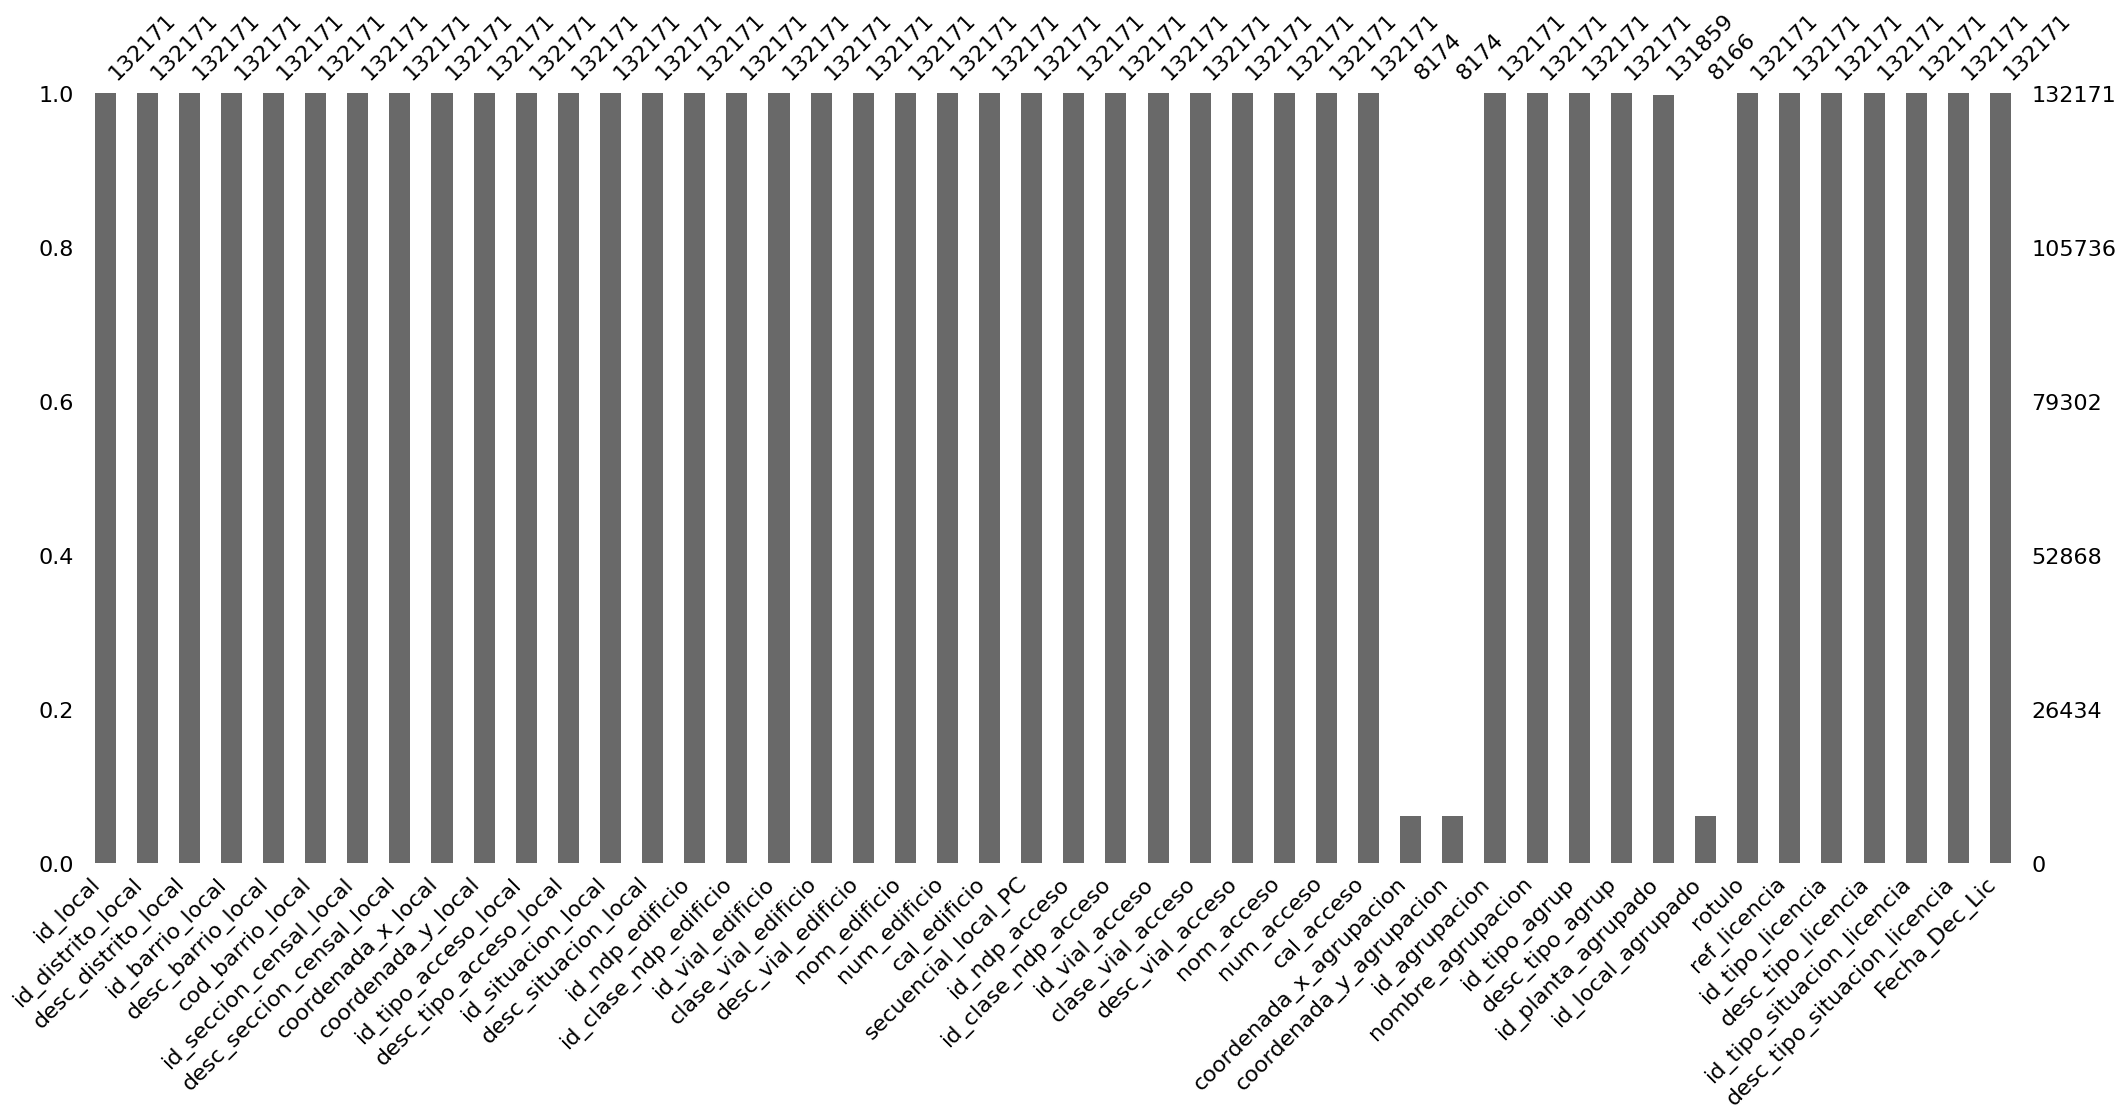

In [6]:
msno.bar(licencias_pd)

<Axes: >

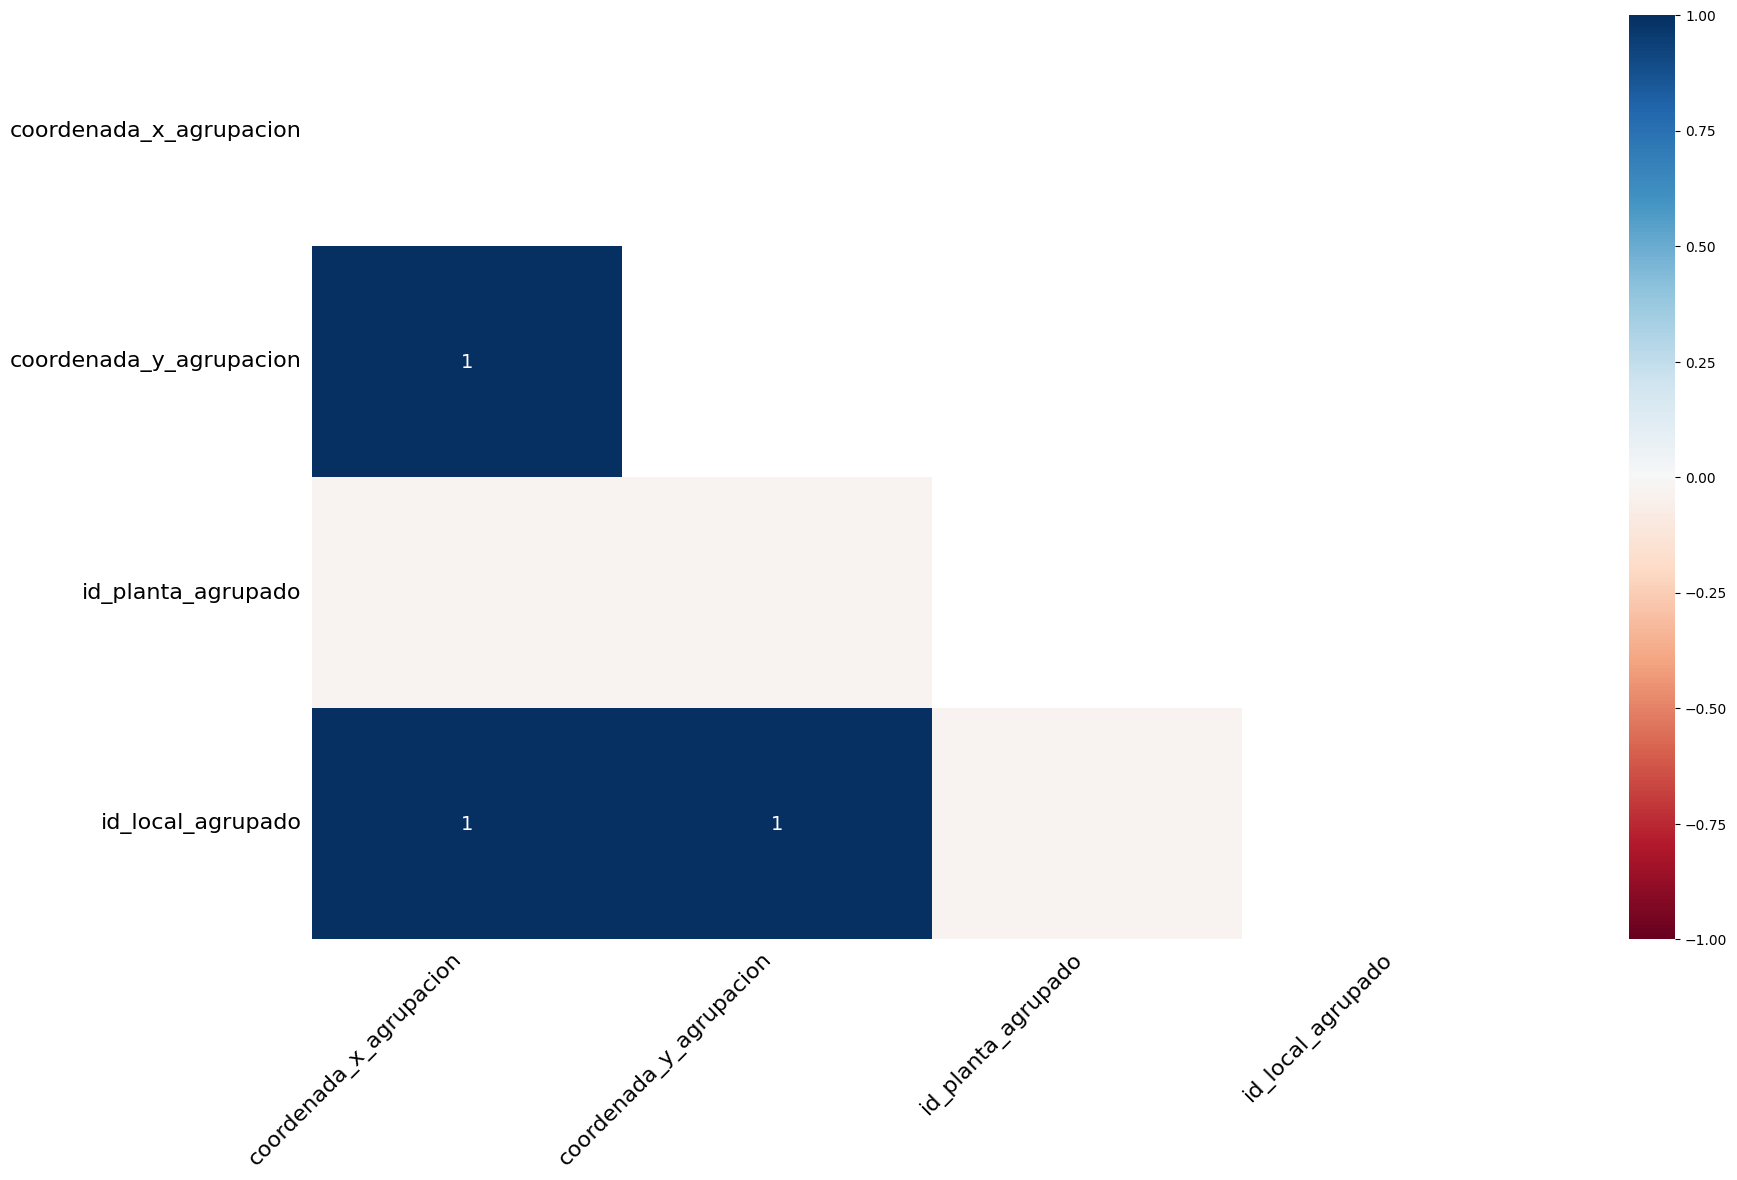

In [7]:
msno.heatmap(licencias_pd)

<Axes: >

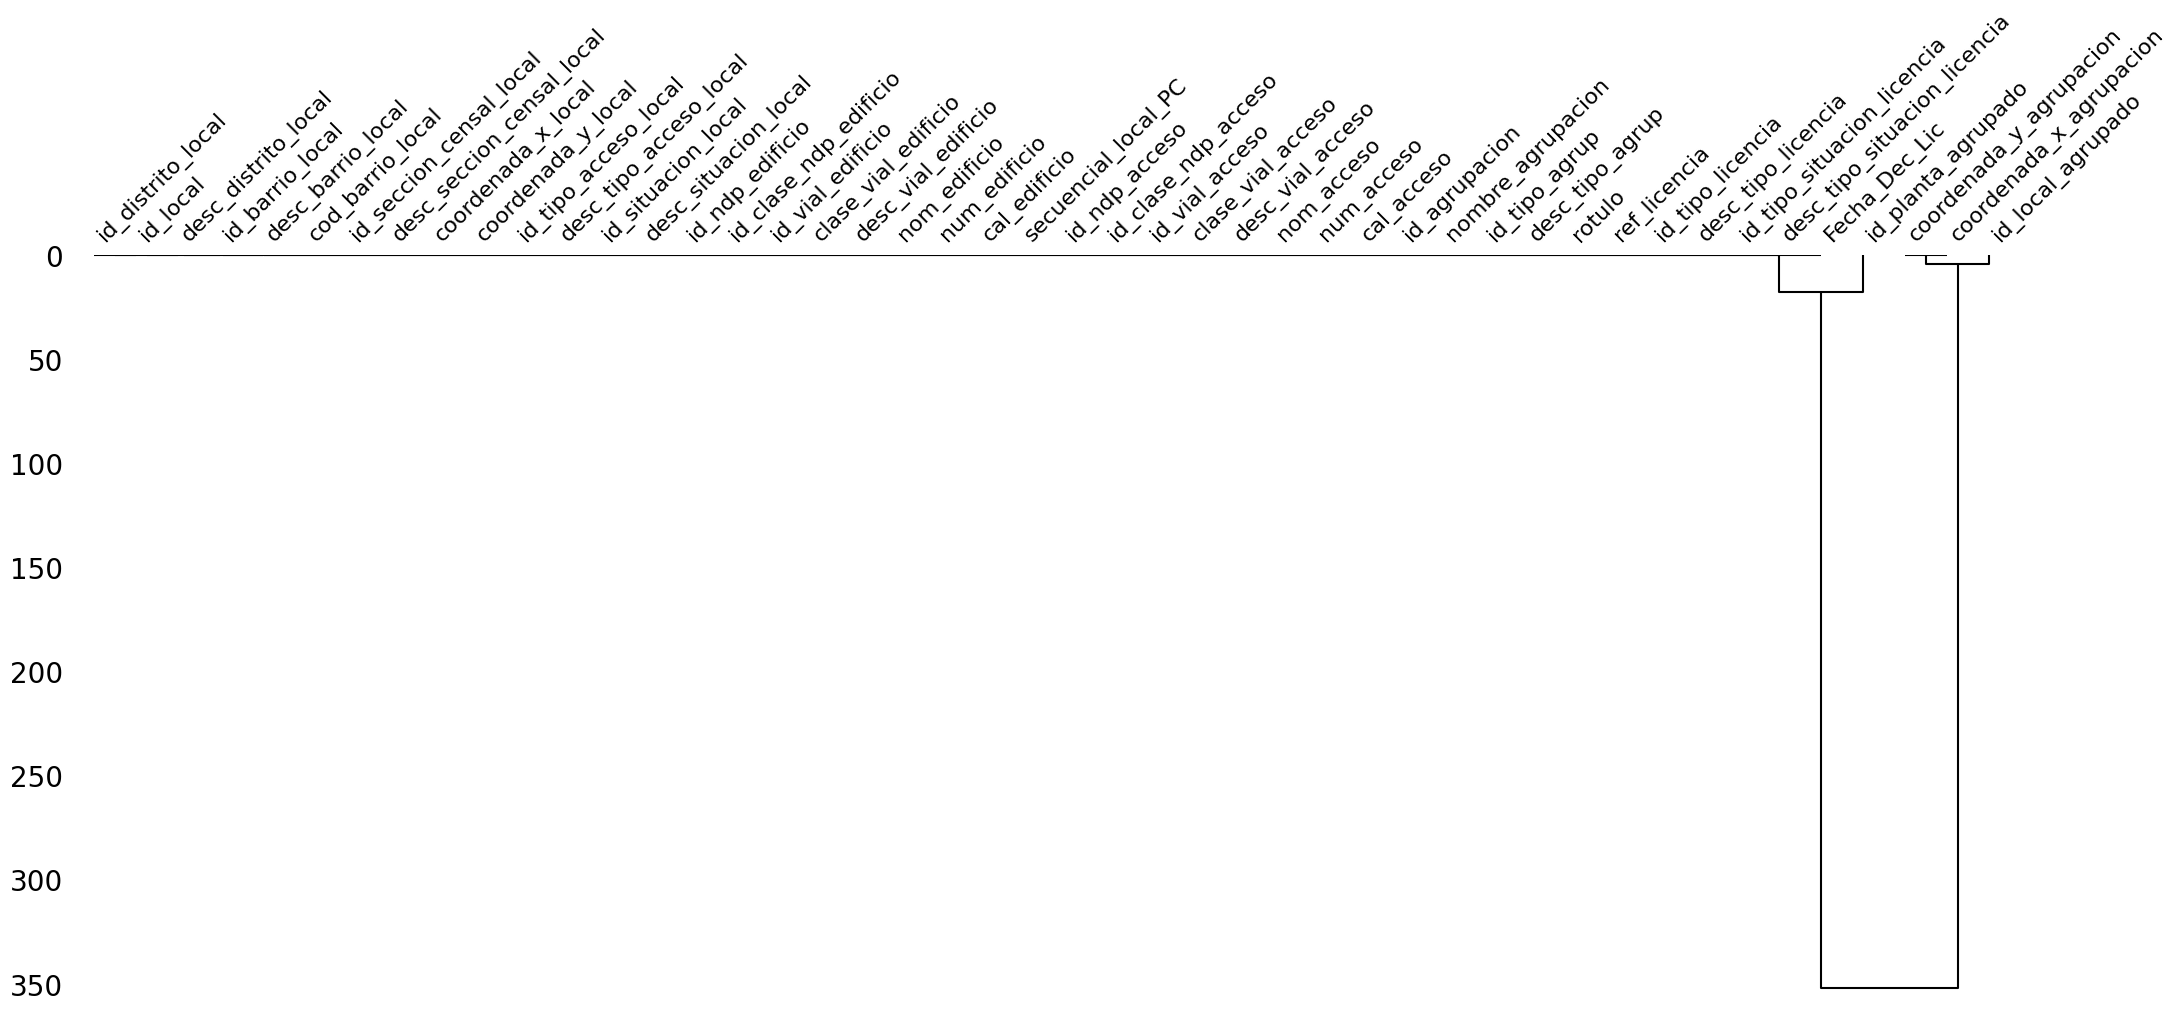

In [8]:
msno.dendrogram(licencias_pd)

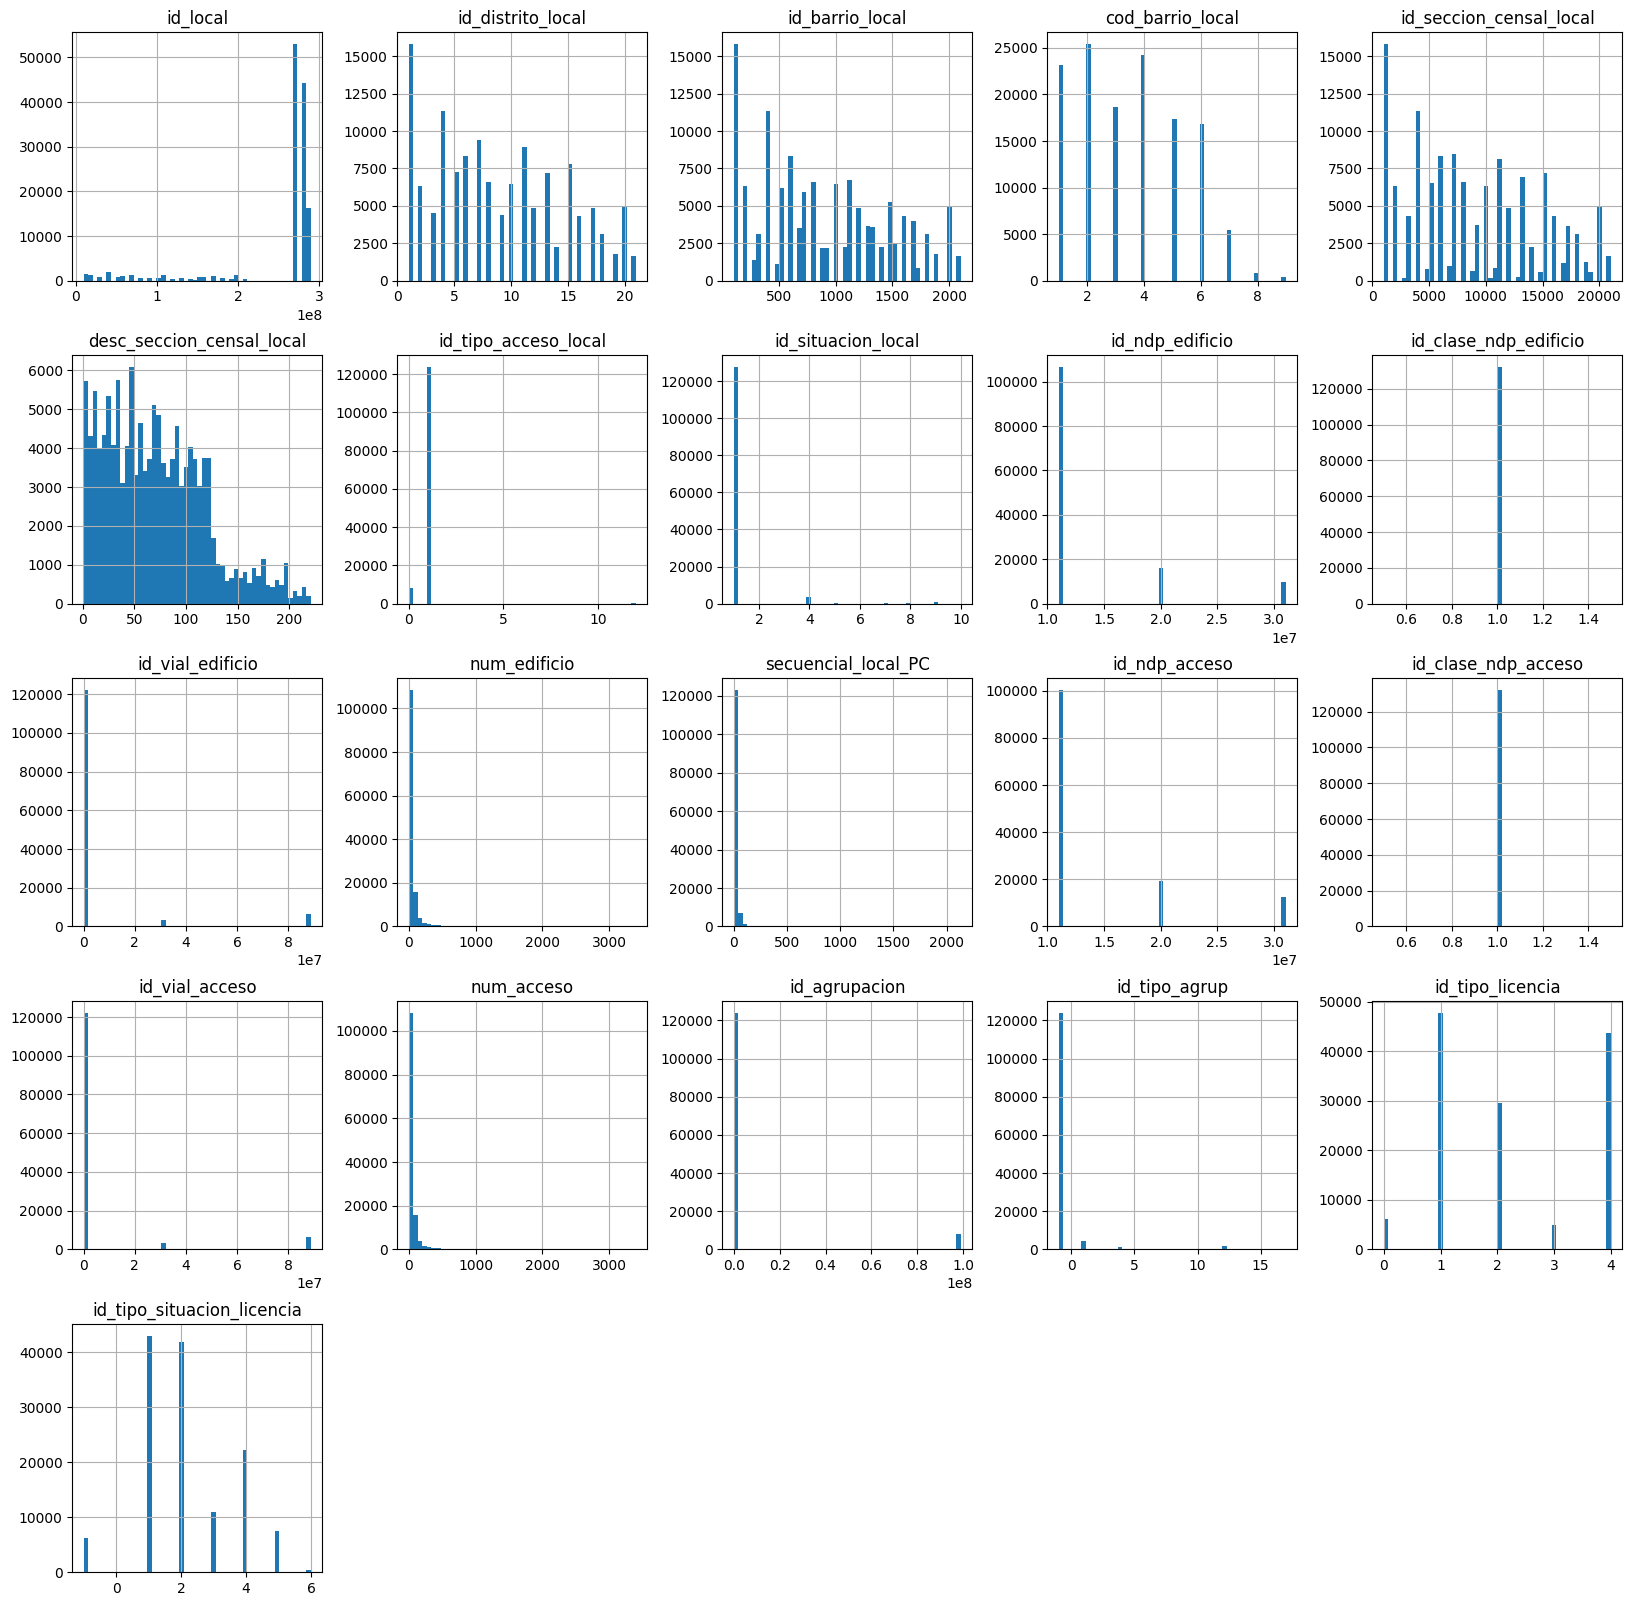

In [9]:
histograma = licencias_pd.hist(figsize=(20, 20), bins=50)


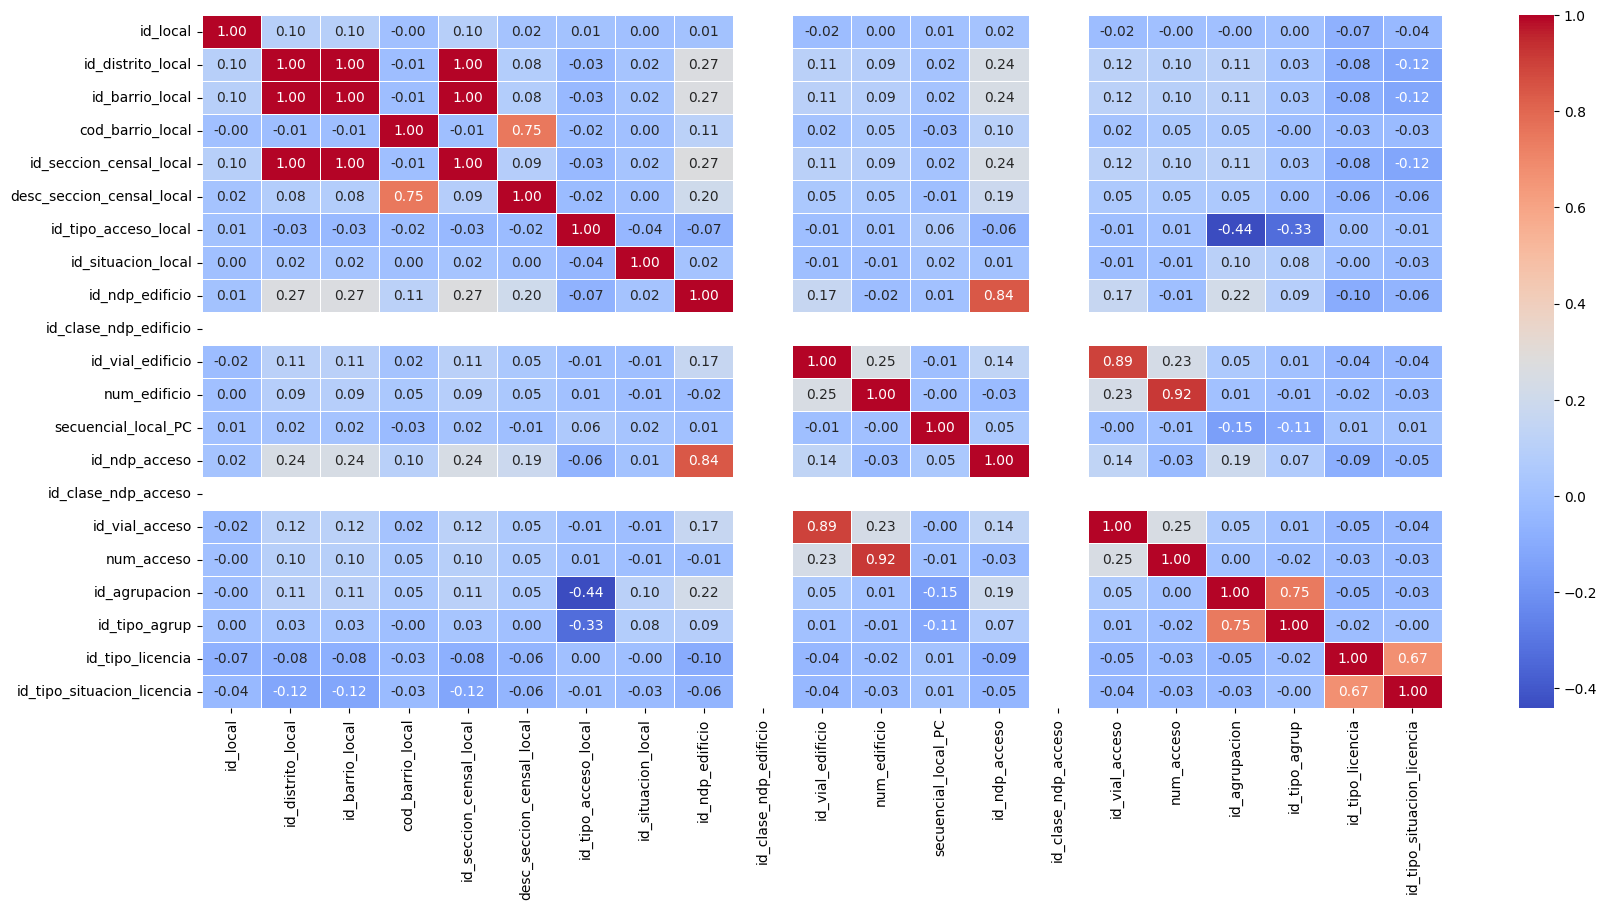

In [10]:
# Filtrar solo columnas numéricas del DataFrame
plt.figure(figsize=(20, 9))
df_numerico = licencias_pd.select_dtypes(include=['number'])
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm', fmt=".2f",linewidth=.5)
plt.show()

C:\Users\ansab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


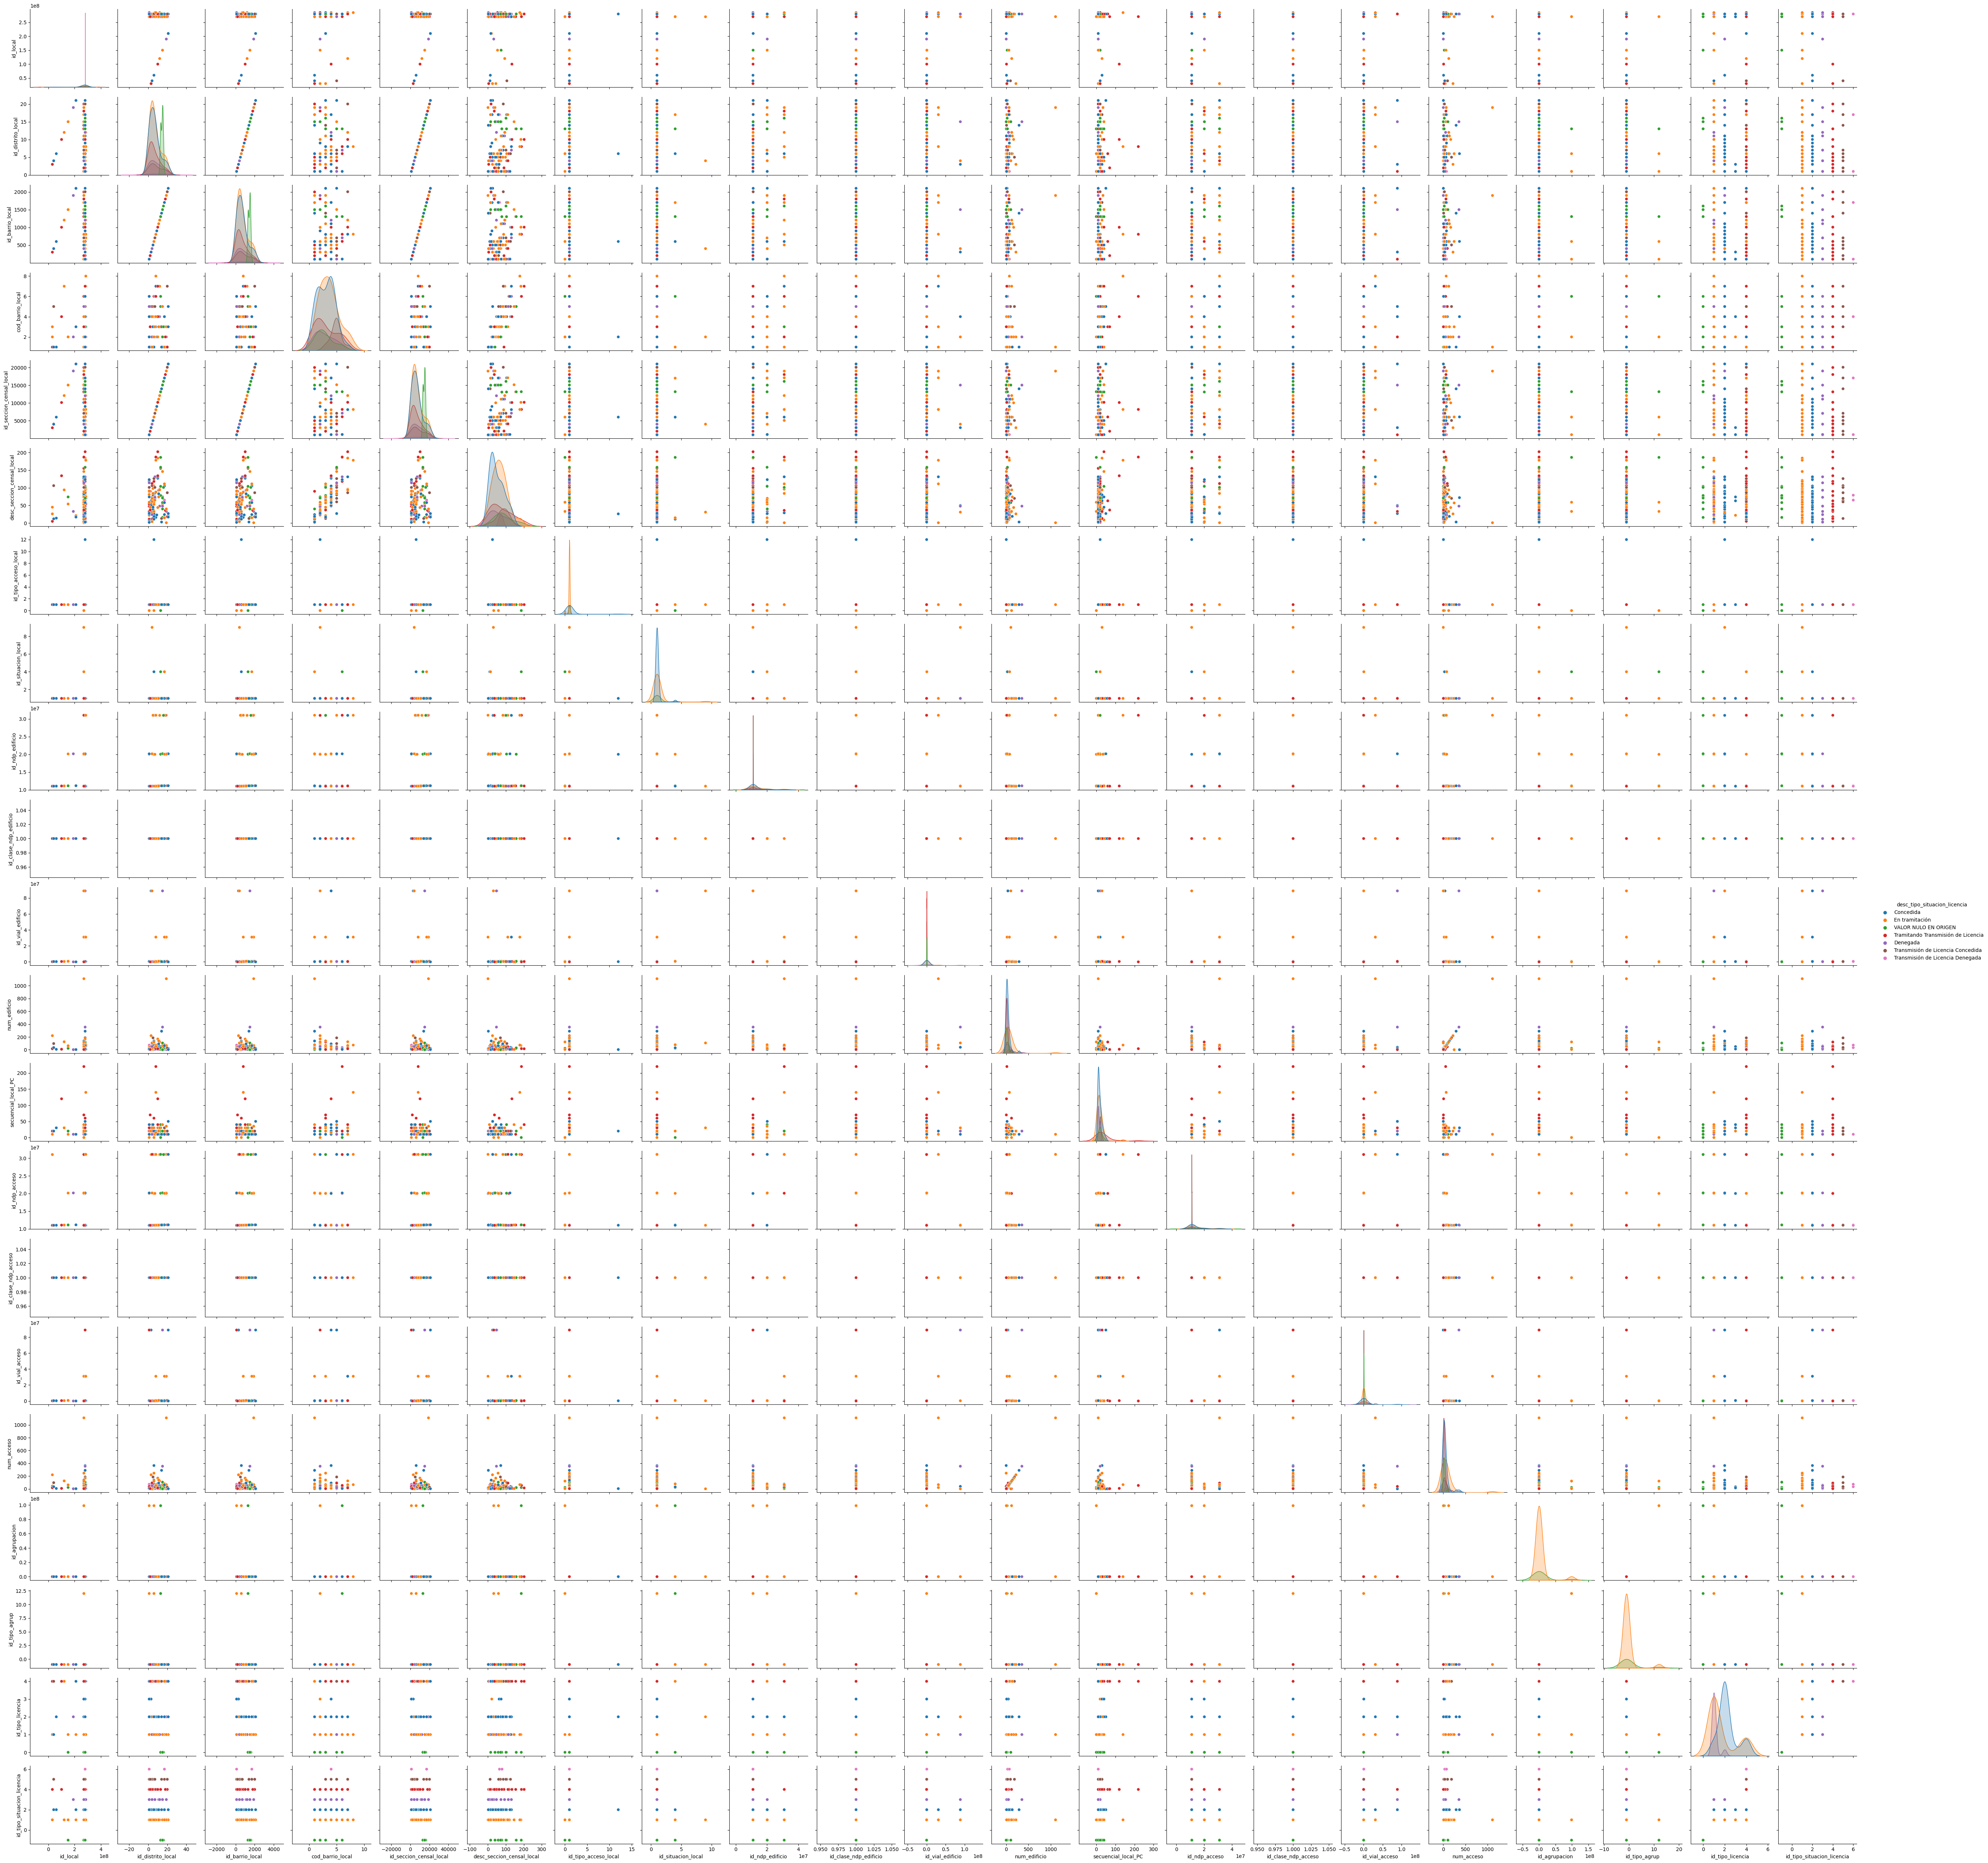

In [11]:
# Tomar una muestra aleatoria del 0.1% de los datos
sample_df = licencias_pd.sample(frac=0.001, random_state=1)

# Crear la matriz de gráficos de dispersión
sns.pairplot(sample_df, hue='desc_tipo_situacion_licencia')
plt.show()

In [16]:
# Eliminar columnas sin datos
licencias_pd_edit = licencias_pd.drop(['coordenada_x_agrupacion','coordenada_y_agrupacion',
                                       'id_local_agrupado'], axis=1)

licencias_pd_edit.isnull().sum()[licencias_pd_edit.isnull().sum() > 0]

id_planta_agrupado    312
dtype: int64

In [17]:
# eliminar filas id_planta_agrupado nulos
licencias_pd_edit = licencias_pd_edit.dropna(subset=['id_planta_agrupado'])

licencias_pd_edit.isnull().sum()[licencias_pd_edit.isnull().sum() > 0]


Series([], dtype: int64)

In [18]:
licencias_pd_edit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131859 entries, 0 to 132169
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   id_local                      131859 non-null  int64 
 1   id_distrito_local             131859 non-null  int64 
 2   desc_distrito_local           131859 non-null  object
 3   id_barrio_local               131859 non-null  int64 
 4   desc_barrio_local             131859 non-null  object
 5   cod_barrio_local              131859 non-null  int64 
 6   id_seccion_censal_local       131859 non-null  int64 
 7   desc_seccion_censal_local     131859 non-null  int64 
 8   coordenada_x_local            131859 non-null  object
 9   coordenada_y_local            131859 non-null  object
 10  id_tipo_acceso_local          131859 non-null  int64 
 11  desc_tipo_acceso_local        131859 non-null  object
 12  id_situacion_local            131859 non-null  int64 
 13  desc

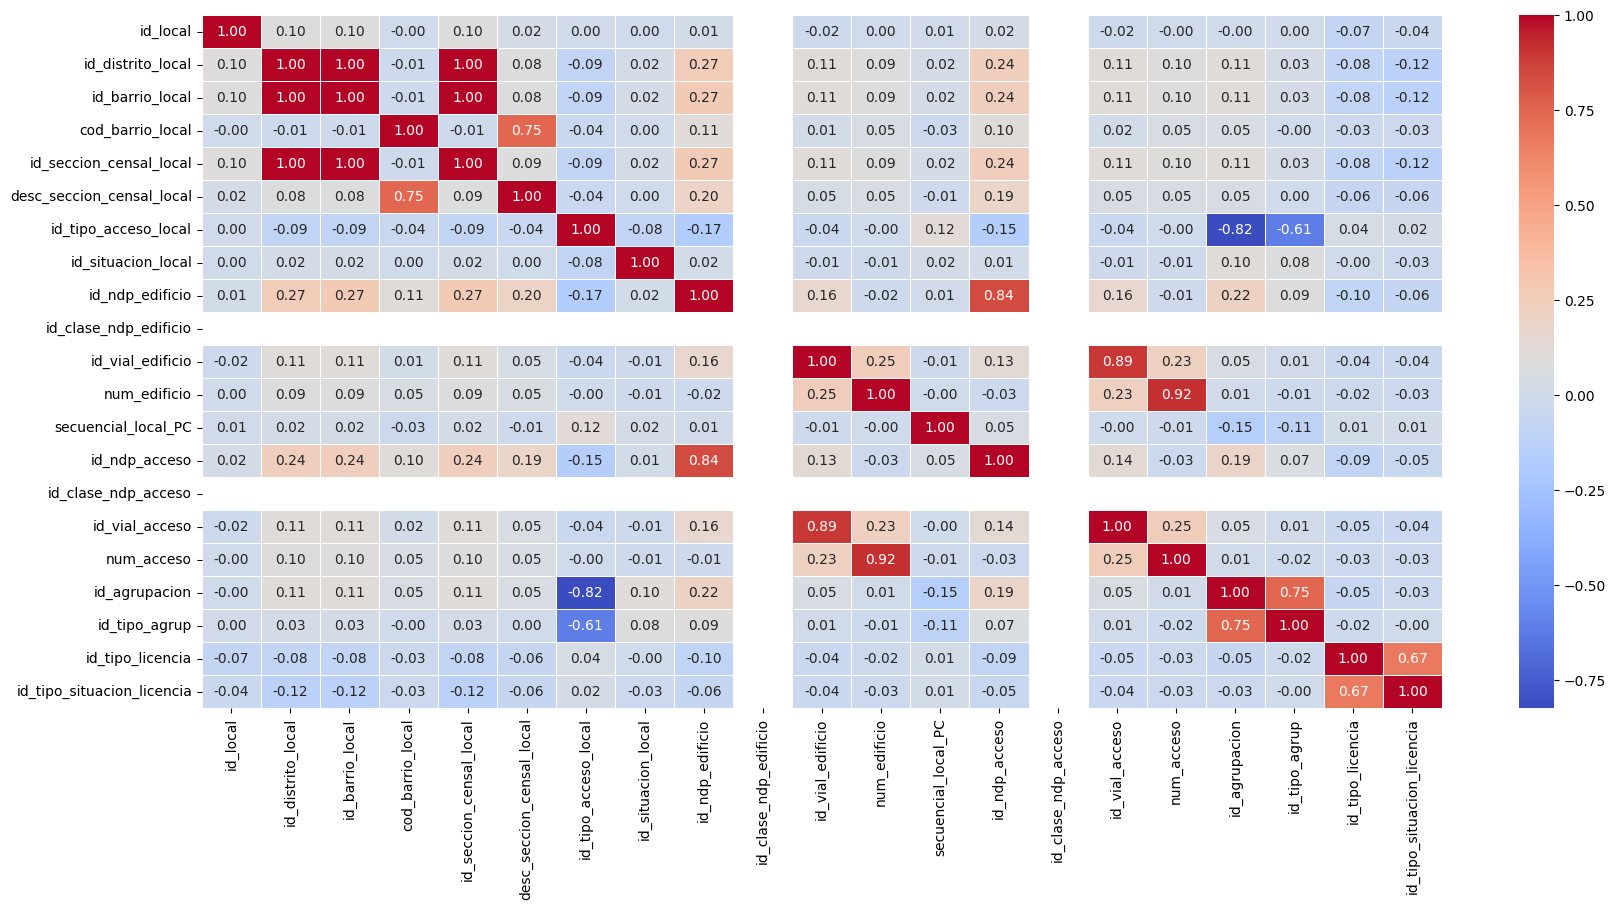

In [19]:
# Filtrar solo columnas numéricas del DataFrame
plt.figure(figsize=(20, 9))
df_numerico = licencias_pd_edit.select_dtypes(include=['number'])
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm', fmt=".2f",linewidth=.5)
plt.show()

In [20]:
# guardar el dataset editado
licencias_pd_edit.to_csv('Licencias_Locales_202104_edit.csv', index=False)
